In [1]:
import numpy as np
import pandas as pd

train_df = pd.read_csv('./input/train.csv', index_col=0)
test_df = pd.read_csv('./input/test.csv', index_col=0)
train_df['MSSubClass'] = train_df['MSSubClass'].astype(str)
train_df['MoSold'] = train_df['MoSold'].astype(str)

y_train = np.log1p(train_df.pop('SalePrice'))
all_df = pd.concat((train_df, test_df), axis=0)

num_cols = all_df.columns[all_df.dtypes != 'object']
cat_cols = all_df.columns[all_df.dtypes == 'object']
all_df[cat_cols]=all_df[cat_cols].fillna('none')


In [187]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

num_pipeline = Pipeline([
       ('imputer', Imputer(strategy="median")),
       ('std_scaler', StandardScaler()),
   ])

housing_num_tr = num_pipeline.fit_transform(all_df[num_cols])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [210]:
from sklearn.preprocessing import OneHotEncoder
housing_cats=[]
for c in cat_cols:
    housing_cat = all_df[[c]]
    cat_encoder = OneHotEncoder(sparse=False)
    cat_onehot = cat_encoder.fit_transform(housing_cat)
    housing_cats.append(cat_onehot)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and sil

In [2]:
from sklearn.preprocessing import LabelEncoder

for c in cat_cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_df[c].values)) 
    all_df[c] = lbl.transform(list(all_df[c].values))

In [10]:
all_df.isnull().sum().sort_values(ascending=False)

SaleCondition    0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
YearRemodAdd     0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
RoofStyle        0
YearBuilt        0
Heating          0
Utilities        0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
                ..
ScreenPorch      0
GarageFinish     0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
GarageCars       0
GarageYrBlt      0
CentralAir       0
FullBath         0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
HalfBath         0
GarageType  

In [5]:
mean_cols = all_df.mean()
all_df = all_df.fillna(mean_cols)

In [11]:
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df[MSSubClass]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_none,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.000000,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,1,0,0,0,0,0,1,0
2,80.000000,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,1,0,0,0,0,0,1,0
3,68.000000,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,1,0,0,0,0,0,1,0
4,60.000000,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,1,0,1,0,0,0,0,0
5,84.000000,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,1,0,0,0,0,0,1,0
6,85.000000,14115,5,5,1993,1995,0.0,732.0,0.0,64.0,...,0,0,1,0,0,0,0,0,1,0
7,75.000000,10084,8,5,2004,2005,186.0,1369.0,0.0,317.0,...,0,0,1,0,0,0,0,0,1,0
8,69.305795,10382,7,6,1973,1973,240.0,859.0,32.0,216.0,...,0,0,1,0,0,0,0,0,1,0
9,51.000000,6120,7,5,1931,1950,0.0,0.0,0.0,952.0,...,0,0,1,0,1,0,0,0,0,0


In [6]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2919 non-null int64
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null int64
Alley            2919 non-null int64
LotShape         2919 non-null int64
LandContour      2919 non-null int64
Utilities        2919 non-null int64
LotConfig        2919 non-null int64
LandSlope        2919 non-null int64
Neighborhood     2919 non-null int64
Condition1       2919 non-null int64
Condition2       2919 non-null int64
BldgType         2919 non-null int64
HouseStyle       2919 non-null int64
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null int64
RoofMatl         2919 non-null int64
Exterior1st      2919 non-null int64
Exterior2nd      2919 non-null int64
Mas

In [229]:
cat_attribs

'MSZoning'

In [185]:
all_df.join(cat_onehot_ms.values)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [19]:
#拆分训练集和测试集
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]
dummy_train_df.shape, dummy_test_df.shape

((1460, 364), (1459, 364))

In [20]:
#回归岭算法
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
X_train = dummy_train_df.values
X_test = dummy_test_df.values

alphas = np.logspace(-3, 2, 50)
test_scores_ridge = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score_ridge = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores_ridge.append(np.mean(test_score_ridge))

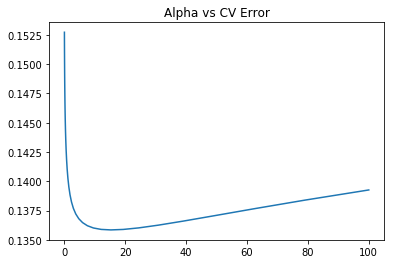

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(alphas, test_scores_ridge)
plt.title("Alpha vs CV Error");

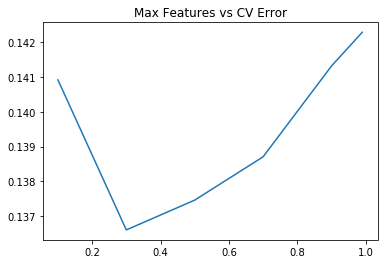

In [22]:
#随机森林
from sklearn.ensemble import RandomForestRegressor
max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

plt.plot(max_features, test_scores)
plt.title("Max Features vs CV Error");

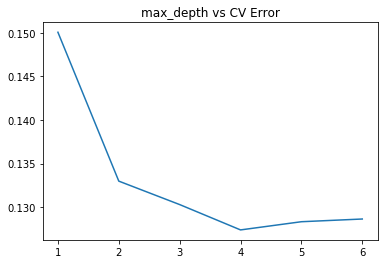

In [24]:
#XGBoost
from xgboost import XGBRegressor
params = [1,2,3,4,5,6]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
    
plt.plot(params, test_scores)
plt.title("max_depth vs CV Error");

In [26]:
clf = XGBRegressor(max_depth=4)
clf.fit(X_train, y_train)
y_clf = np.expm1(clf.predict(X_test))

In [27]:
submission_df = pd.DataFrame(data= {'Id' : test_df.index, 'SalePrice': y_clf})
submission_df.to_csv("./output/house_price_190208_1657.csv")

In [28]:
ridge = Ridge(alpha=15)
ridge.fit(X_train, y_train)
y_clf = np.expm1(ridge.predict(X_test))

In [29]:
submission_df = pd.DataFrame(data= {'Id' : test_df.index, 'SalePrice': y_clf})
submission_df.to_csv("./output/house_price_190208_1702.csv")